# Exercice 2 - System evaluation

## Imports

In [113]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Load data

Define the path of the data file

In [114]:
path = "ex2-system-a.csv"

Read the CSV file using `read_csv`

In [115]:
dataset_a = pd.read_csv(path, sep=";", index_col=False, names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "y_true"])

Display first rows

In [116]:
dataset_a.head()

,0,1,2,3,4,5,6,7,8,9,y_true
0,5.348450e-08,7.493480e-10,8.083470e-07,2.082290e-05,5.222360e-10,2.330260e-08,5.241270e-12,9.999650e-01,4.808590e-07,0.000013,7
1,1.334270e-03,3.202960e-05,8.504280e-01,1.669090e-03,1.546460e-07,2.412940e-04,1.448280e-01,1.122810e-11,1.456330e-03,0.000011,2
2,3.643050e-06,9.962760e-01,2.045910e-03,4.210530e-04,2.194020e-05,1.644130e-05,2.838160e-04,3.722960e-04,5.150120e-04,0.000044,1
3,9.998200e-01,2.550390e-10,1.112010e-05,1.653200e-05,5.375730e-10,8.999750e-05,9.380920e-06,4.464470e-05,2.418440e-06,0.000006,0
4,2.092460e-08,7.464220e-08,3.560820e-05,5.496200e-07,9.988960e-01,3.070920e-08,2.346150e-04,9.748010e-07,1.071610e-06,0.000831,4


Store some useful statistics (class names + number of classes)

In [117]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
nb_classes = len(class_names)

## Exercise's steps

a) Write a function to take classification decisions on such outputs according to Bayes’rule.

In [118]:
def bayes_classification(df):
    """
    Take classification decisions according to Bayes rule.
        
    Parameters
    ----------
    df : Pandas DataFrame of shape (n_samples, n_features + ground truth)
         Dataset.
         
    Returns
    -------
    preds : Numpy array of shape (n_samples,)
            Class labels for each data sample.
    """
    # Your code here
    preds = np.argmax(df.iloc[: , :-1], axis = 1) # axis = 1 => max on rows
    return preds

b) What is the overall error rate of the system ?

In [119]:
# Your code here: compute and print the error rate of the system
predictions = bayes_classification(dataset_a)
error_rate = (predictions != dataset_a["y_true"]).sum() / dataset_a["y_true"].size * 100
print(f"The error rate of A is: {error_rate:.2f} %")

The error rate of A is: 10.73 %


c) Compute and report the confusion matrix of the system.

In [120]:
def confusion_matrix(y_true, y_pred, n_classes):
    """
    Compute the confusion matrix.
        
    Parameters
    ----------
    y_true : Numpy array of shape (n_samples,)
             Ground truth.
    y_pred : Numpy array of shape (n_samples,)
             Predictions.
    n_classes : Integer
                Number of classes.
         
    Returns
    -------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
    """
    # Your code here
    cm = np.zeros(shape=(n_classes, n_classes), dtype=int)
    
    for i in range(0, len(y_true)):
        cm[y_true[i]][y_pred[i]] += 1
        
    return cm

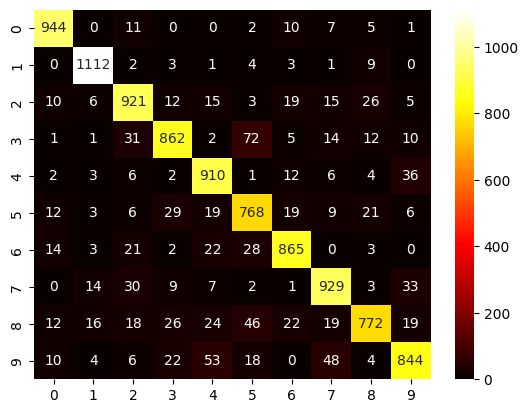

In [121]:
# Your code here: compute and print the confusion matrix
cm = confusion_matrix(dataset_a["y_true"], predictions, nb_classes)
sb.heatmap(cm, annot=True, fmt='.0f', cmap='hot')
plt.show()

d) What are the worst and best classes in terms of precision and recall ?

In [122]:
def precision_per_class(cm):
    """
    Compute the precision per class.
        
    Parameters
    ----------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
         
    Returns
    -------
    precisions : Numpy array of shape (n_classes,)
                 Precision per class.
    """
    # Your code here
    precisions = np.zeros(shape=nb_classes, dtype=float)
    
    for i in range(0, nb_classes) :
        TP = cm[i][i]
        TP_and_FP = np.sum(cm[:, i])
        precisions[i] = TP / TP_and_FP

    return precisions

In [123]:
def recall_per_class(cm):
    """
    Compute the recall per class.
        
    Parameters
    ----------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
         
    Returns
    -------
    recalls : Numpy array of shape (n_classes,)
              Recall per class.
    """
    # Your code here
    recalls = np.zeros(shape=nb_classes, dtype=float)
    
    for i in range(0, nb_classes) :
        TP = cm[i][i]
        TP_and_FN = np.sum(cm[i, :])
        recalls[i] = TP / TP_and_FN
    
    return recalls

In [124]:
# Your code here: find and print the worst and best classes in terms of precision
precisions = precision_per_class(cm)
min_prec = np.argmin(precisions)
max_prec = np.argmax(precisions)
print(f"Worst class: {min_prec} (precision: {precisions[min_prec]})")
print(f"Best  class: {max_prec} (precision: {precisions[max_prec]})")

Worst class: 5 (precision: 0.8135593220338984)
Best  class: 1 (precision: 0.9569707401032702)


In [125]:
# Your code here: find and print the worst and best classes in terms of recall
recalls = recall_per_class(cm)
min_rec = np.argmin(recalls)
max_rec = np.argmax(recalls)
print(f"Worst class: {min_rec} (recall: {recalls[min_rec]})")
print(f"Best  class: {max_rec} (recall: {recalls[max_rec]})")

Worst class: 8 (recall: 0.7926078028747433)
Best  class: 1 (recall: 0.9797356828193833)


e) In file `ex1-system-b.csv` you find the output of a second system B. What is the best system between (a) and (b) in terms of error rate and F1.

The error rate of B is: 3.87 %


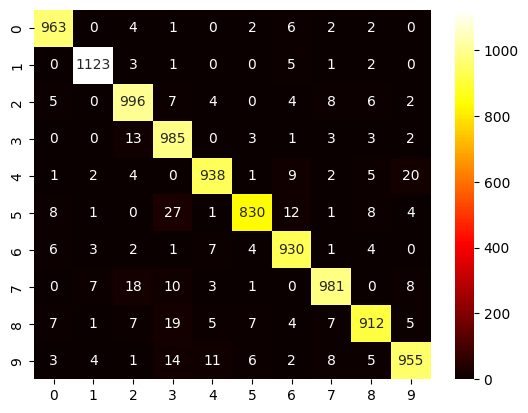

In [126]:
# Your code here: load the data of the system B
path_2 = "ex2-system-b.csv"
dataset_b = pd.read_csv(path_2, sep=";", index_col=False, names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "y_true"])

predictions_b = bayes_classification(dataset_b)
error_rate_b = (predictions_b != dataset_b["y_true"]).sum() / dataset_b["y_true"].size * 100
print(f"The error rate of B is: {error_rate_b:.2f} %")

cm_b = confusion_matrix(dataset_b["y_true"], predictions_b, nb_classes)
sb.heatmap(cm_b, annot=True, fmt='.0f', cmap='hot')
plt.show()

In [127]:
def system_accuracy(cm):
    """
    Compute the system accuracy.
        
    Parameters
    ----------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
         
    Returns
    -------
    accuracy : Float
               Accuracy of the system.
    """
    # Your code here
    return np.sum(np.diag(cm)) / np.sum(cm)

In [128]:
def system_f1_score(cm):
    """
    Compute the system F1 score.
        
    Parameters
    ----------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
         
    Returns
    -------
    f1_score : Float
               F1 score of the system.
    """
    # Your code here
    precisions = precision_per_class(cm)
    recalls = recall_per_class(cm)
    
    f1_scores = 2 * precisions * recalls / (precisions + recalls)
    return np.mean(f1_scores)

In [129]:
# Your code here: compute and print the accuracy and the F1 score of the system A
print(f"Accuracy of system A : {system_accuracy(cm):.4f}")
print(f"F1 score of system A : {system_f1_score(cm):.4f}")

Accuracy of system A : 0.8927
F1 score of system A : 0.8907


In [130]:
# Your code here: compute and print the accuracy and the F1 score of the system B
print(f"Accuracy of system B : {system_accuracy(cm_b):.4f}")
print(f"F1 score of system B : {system_f1_score(cm_b):.4f}")

Accuracy of system B : 0.9613
F1 score of system B : 0.9609


Conclusion:

System B is better, it has both higher accuracy and higher F1